In [15]:
#library(GEOquery)
gds <- getGEO("GDS5047")
eset <- GDS2eSet(gds)
eset

Using locally cached version of GDS5047 found here:
/var/folders/ln/d0zsykhs2bngltydbxt7vtp00000gn/T//RtmpGoTS3S/GDS5047.soft.gz 
Parsed with column specification:
cols(
  .default = col_double(),
  ID_REF = col_character(),
  IDENTIFIER = col_character()
)
See spec(...) for full column specifications.
Using locally cached version of GPL6947 found here:
/var/folders/ln/d0zsykhs2bngltydbxt7vtp00000gn/T//RtmpGoTS3S/GPL6947.annot.gz 


ExpressionSet (storageMode: lockedEnvironment)
assayData: 49576 features, 60 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: GSM1324896 GSM1324897 ... GSM1324949 (60 total)
  varLabels: sample agent individual description
  varMetadata: labelDescription
featureData
  featureNames: ILMN_1725881 ILMN_1910180 ... ILMN_1343487 (49576
    total)
  fvarLabels: ID Gene title ... Platform_SEQUENCE (22 total)
  fvarMetadata: Column labelDescription
experimentData: use 'experimentData(object)'
  pubMedIds: 24642598 
Annotation:  

In [12]:
dados = exprs(eset)
bad.gene = rowMeans(is.na(dados)) == 1
dados = dados[!bad.gene,]
dados[1:10,1:6]

,GSM1324896,GSM1324897,GSM1324898,GSM1324902,GSM1324903,GSM1324904
ILMN_1725881,138.397,145.568,153.135,154.422,148.452,128.521
ILMN_1910180,202.241,178.467,187.169,185.775,198.660,193.436
ILMN_1804174,151.331,154.693,148.537,124.543,145.652,157.108
ILMN_1796063,3674.630,3758.130,3551.290,3570.470,3307.410,3356.730
ILMN_1811966,146.659,152.156,174.390,156.571,140.980,155.371
ILMN_1668162,137.360,132.596,149.620,125.695,133.508,113.138
ILMN_1715600,130.486,130.722,135.714,139.556,157.778,124.590
ILMN_1912287,168.532,153.522,147.533,207.480,187.588,176.482
ILMN_1793729,184.680,173.388,171.889,169.449,188.099,173.581
ILMN_1889125,116.875,122.174,137.577,156.715,139.895,121.550


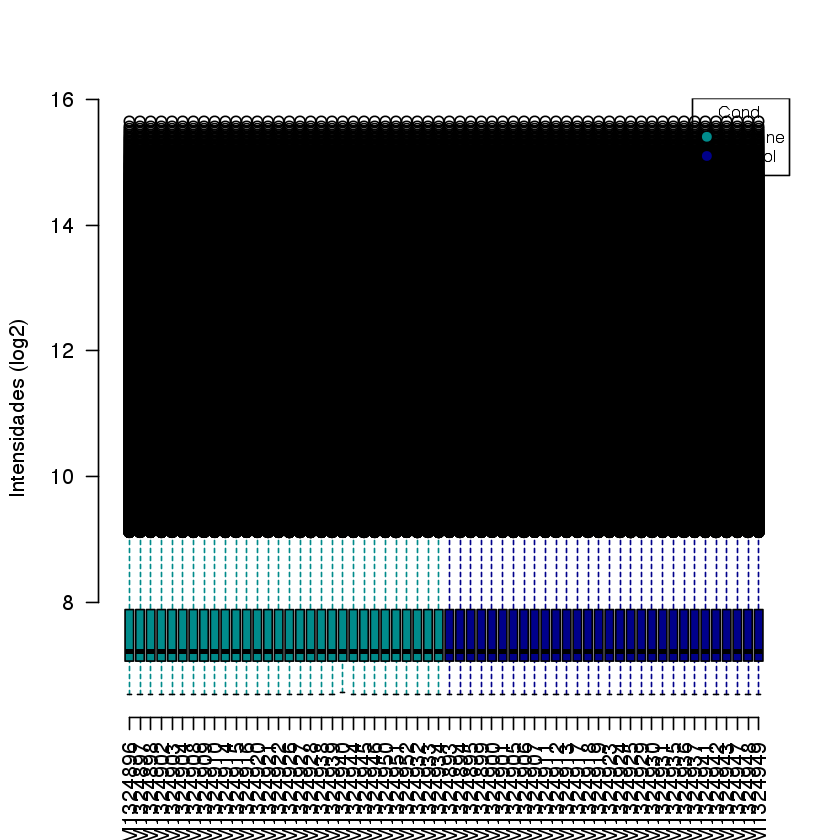

In [9]:
c = colors()
boxplot(log2(dados), col = c[as.integer(eset$agent)+71], whiskcol =c[as.integer(eset$agent)+71], xlab = '', ylab = "Intensidades (log2)",las = 2,frame=FALSE)
legend("topright", legend=c("Cocaine","Control"), col = c[c(72,73)], pch=c(19), title="Cond.",cex = 0.8)

In [10]:
vars = pData(eset)
names(vars)

[1] "sample"      "agent"       "individual"  "description"

In [12]:
ftable(vars$agent, vars$individual, dnn = c("Agent", "Ind"))

        Ind 10 11 12 13 14 15 16 37 38 41 42 50 51 52 53 56 57 7 8 9
Agent                                                               
cocaine      3  0  3  0  3  0  3  0  3  0  3  0  3  0  3  0  3 0 3 0
control      0  3  0  3  0  3  0  3  0  3  0  3  0  3  0  3  0 3 0 3

In [13]:
sum(is.na(dados))

[1] 0